<h2>Assignment 1 - Linear Regression on Diabetes Dataset</h2>

In [6]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target


<h4>Task  1: Prepare the 3 datasets</h4>

In [7]:
# please implement your code for task 1 here

X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 265
Validation set size: 88
Testing set size: 89


<h4>Task 2: Use linear regression from scikit-learn in the following cell, for comparsion of results with basic gradient method and stochastic gradient descent method</h4>

Note: linear regression from scikit-learn uses the closed-form solution of the optimal solution.

In [18]:
# please implement your code for task 2 here

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

bias = lin_reg.intercept_
weights = lin_reg.coef_

print("Bias (intercept):", bias)
print("Weights (coefficients):", weights)

def compute_loss(y_true, y_pred):
    N = len(y_true)
    loss = (1/(2*N)) * np.sum((y_true - y_pred)**2)
    return loss

y_train_pred = lin_reg.predict(X_train)
y_val_pred = lin_reg.predict(X_val)
y_test_pred = lin_reg.predict(X_test)

train_loss = compute_loss(y_train, y_train_pred)
val_loss = compute_loss(y_val, y_val_pred)
test_loss = compute_loss(y_test, y_test_pred)

print("\nTraining loss:", train_loss)
print("Validation loss:", val_loss)
print("Testing loss:", test_loss)


Bias (intercept): 148.92850837170067
Weights (coefficients): [  18.08799763 -227.04344876  592.27723487  361.54123241 -655.90738774
  353.71636413   14.41265469  142.87369371  594.01542882   31.67317969]

Training loss: 1473.4267966748673
Validation loss: 1207.8461349484503
Testing loss: 1622.8057004876184


<h4> Task 3: Use basic gradient descent to perform linear regression in the following cell</h4>

Note: Basic gradient descent method computes the gradient using whole training data examples in each iteration.

Bias (intercept): 148.87824166187534
Weights (coefficients): [  27.74027637 -224.65893764  598.09361237  355.34326267  -94.69914599
 -103.43263233 -216.02114874  102.01411073  359.63709672   46.42729401]

Final Training loss: 1480.691208215698
Final Validation loss: 1218.352657306353
Final Testing loss: 1649.1295041682772


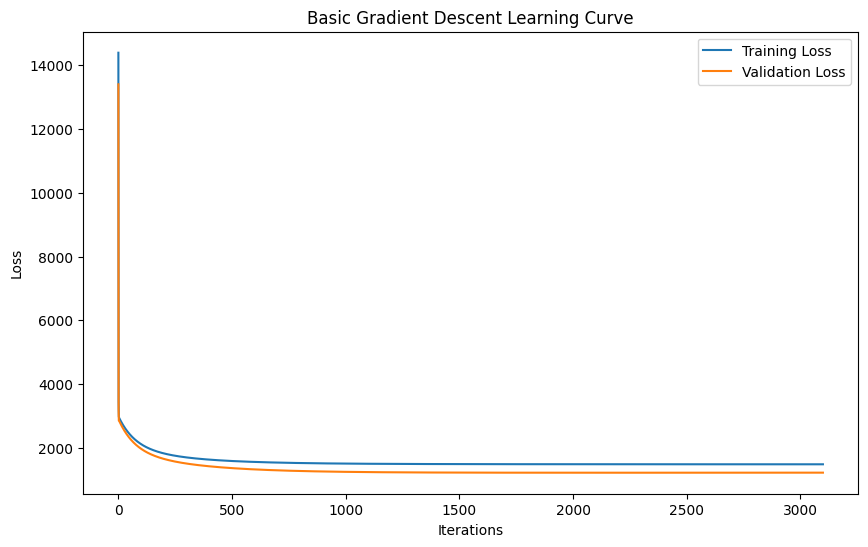

In [32]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.8 # learning rate
numItrs = 3000  # number of iterations

# please implement your code for task 3 here

N = X_train.shape[0]
n_features = X_train.shape[1]

weights = np.zeros(n_features)
bias = 0.0

train_losses = []
val_losses = []

def compute_loss(y_true, y_pred):
    N = len(y_true)
    loss = (1/(2*N)) * np.sum((y_true - y_pred)**2)
    return loss

for itr in range(numItrs):

    y_train_pred = np.dot(X_train, weights) + bias

    train_loss = compute_loss(y_train, y_train_pred)

    train_losses.append(train_loss)

    y_val_pred = np.dot(X_val, weights) + bias

    val_loss = compute_loss(y_val, y_val_pred)

    val_losses.append(val_loss)

    dW = -(1/N) * np.dot(X_train.T, (y_train - y_train_pred))
    db = -(1/N) * np.sum(y_train - y_train_pred)

    weights = weights - learning_rate * dW
    bias = bias - learning_rate * db

print("Bias (intercept):", bias)
print("Weights (coefficients):", weights)

y_train_pred = np.dot(X_train, weights) + bias
train_loss = compute_loss(y_train, y_train_pred)

y_val_pred = np.dot(X_val, weights) + bias
val_loss = compute_loss(y_val, y_val_pred)

y_test_pred = np.dot(X_test, weights) + bias
test_loss = compute_loss(y_test, y_test_pred)

print("\nFinal Training loss:", train_loss)
print("Final Validation loss:", val_loss)
print("Final Testing loss:", test_loss)

plt.figure(figsize=(10,6))
plt.plot(range(numItrs), train_losses, label='Training Loss')
plt.plot(range(numItrs), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Basic Gradient Descent Learning Curve')
plt.legend()
plt.show()


<h4> Task 4: Use stochastic gradient descent to perform linear regression in the following cell</h4>

Note:
* Stochastic gradient descent method computes the gradient using only a small **batch** of data examples in each iteration.
* Difference between iterations and epochs
> One **iteration** entails the processing of one batch of data, while one epoch entails the processing of the whole training data.




Bias (intercept): 147.88712409856112
Weights (coefficients): [  32.20913352 -207.90507897  565.1848537   341.8324721   -80.49627459
 -110.78147501 -220.0313071   110.41004314  340.07229665   79.91797492]

Final Training loss: 1484.8848716275247
Final Validation loss: 1221.5547225621174
Final Testing loss: 1653.066587838846


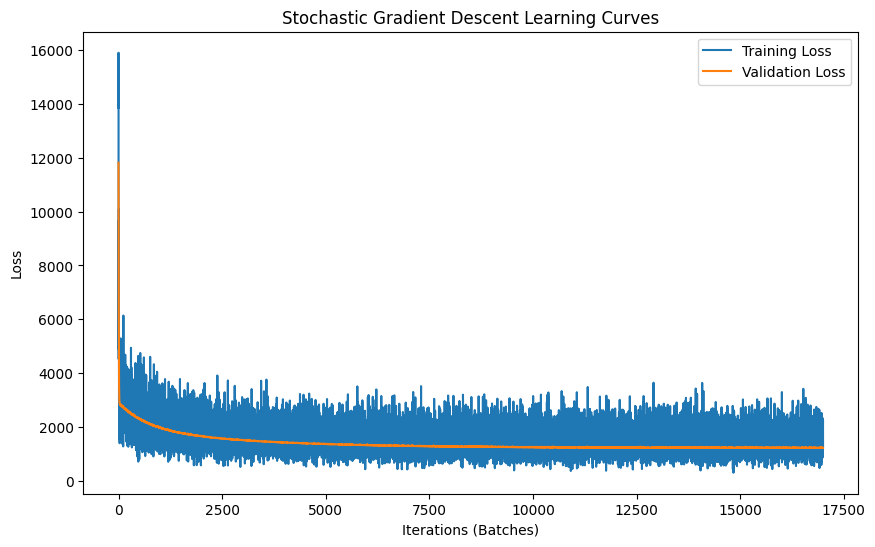

In [43]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.08   # learning rate
batch_size = 16 # number of data samples in a batch
epochs = 1000   # number of epochs

# please implement your code for task 4 here

N = X_train.shape[0]
n_features = X_train.shape[1]

weights = np.zeros(n_features)
bias = 0.0

train_losses = []
val_losses = []

def compute_loss(y_true, y_pred):
    N = len(y_true)
    loss = (1/(2*N)) * np.sum((y_true - y_pred)**2)
    return loss

num_batches = int(np.ceil(N / batch_size))

for epoch in range(epochs):

    permutation = np.random.permutation(N)
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    for i in range(0, N, batch_size):

        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        y_pred = np.dot(X_batch, weights) + bias

        N_batch = len(y_batch)
        dW = -(1/N_batch) * np.dot(X_batch.T, (y_batch - y_pred))
        db = -(1/N_batch) * np.sum(y_batch - y_pred)

        weights = weights - learning_rate * dW
        bias = bias - learning_rate * db

        batch_loss = compute_loss(y_batch, y_pred)
        train_losses.append(batch_loss)

        y_val_pred = np.dot(X_val, weights) + bias
        val_loss = compute_loss(y_val, y_val_pred)
        val_losses.append(val_loss)

print("Bias (intercept):", bias)
print("Weights (coefficients):", weights)

y_train_pred = np.dot(X_train, weights) + bias
train_loss = compute_loss(y_train, y_train_pred)

y_val_pred = np.dot(X_val, weights) + bias
val_loss = compute_loss(y_val, y_val_pred)

y_test_pred = np.dot(X_test, weights) + bias
test_loss = compute_loss(y_test, y_test_pred)

print("\nFinal Training loss:", train_loss)
print("Final Validation loss:", val_loss)
print("Final Testing loss:", test_loss)

plt.figure(figsize=(10,6))
iterations = range(len(train_losses))
plt.plot(iterations, train_losses, label='Training Loss')
plt.plot(iterations, val_losses, label='Validation Loss')
plt.xlabel('Iterations (Batches)')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent Learning Curves')
plt.legend()
plt.show()
